# Real time AQI data through API from (CPCB - India Central Pollution Control Board)

Get the api data from here - > api : http://api.waqi.info/

In [1]:
import requests

In [2]:
#Testing the API connection through requests library and gathering data for "Bhopal" city
city = 'bhopal'
url = 'http://api.waqi.info/feed/' + city + '/?token='
api_key = '47f6631e4b8dd38b5770cb532ec693fcd06c84e3'

#Adding url and api token
main_url = url + api_key
r = requests.get(main_url)
data = r.json()['data']
data

{'aqi': 157,
 'idx': 12429,
 'attributions': [{'url': 'http://cpcb.nic.in/',
   'name': 'CPCB - India Central Pollution Control Board',
   'logo': 'India-CPCB.png'},
  {'url': 'https://waqi.info/', 'name': 'World Air Quality Index Project'}],
 'city': {'geo': [23.233584, 77.400574],
  'name': 'T T Nagar, Bhopal, India',
  'url': 'https://aqicn.org/city/india/bhopal/t-t-nagar'},
 'dominentpol': 'pm25',
 'iaqi': {'co': {'v': 20.1},
  'dew': {'v': 13},
  'h': {'v': 55.5},
  'no2': {'v': 24.2},
  'o3': {'v': 13.6},
  'p': {'v': 705},
  'pm10': {'v': 114},
  'pm25': {'v': 157},
  'so2': {'v': 13.8},
  't': {'v': 29.5},
  'w': {'v': 0.3}},
 'time': {'s': '2022-02-19 20:00:00',
  'tz': '+05:30',
  'v': 1645300800,
  'iso': '2022-02-19T20:00:00+05:30'},
 'forecast': {'daily': {'o3': [{'avg': 14,
     'day': '2022-02-17',
     'max': 24,
     'min': 9},
    {'avg': 12, 'day': '2022-02-18', 'max': 24, 'min': 2},
    {'avg': 9, 'day': '2022-02-19', 'max': 25, 'min': 2},
    {'avg': 13, 'day': '20

# Extracting air quality information

In [3]:
iaqi = data['iaqi']

del iaqi['p']

for info in iaqi.items():
    print(info[0],":",info[1]['v'])

co : 20.1
dew : 13
h : 55.5
no2 : 24.2
o3 : 13.6
pm10 : 114
pm25 : 157
so2 : 13.8
t : 29.5
w : 0.3


In [4]:
#Extracting real time polluntants and printing it.
aqi = data['aqi']
dew = iaqi.get('dew','Nil')
no2 = iaqi.get('no2','Nil')
o3 = iaqi.get('o3','Nil')
so2 = iaqi.get('so2','Nil')
pm10 = iaqi.get('pm10','Nil')
pm25 = iaqi.get('pm25','Nil')

print(f'Real time AQI of {city} is :',aqi,'\n')
print('Individual Air quality')
print('Dew :',dew)
print('NO2 :',no2)
print('Ozone :',o3)
print('Sulphur Dioxide :',so2)
print('PM 10 :',so2)
print('PM 2.5 :',pm25)

Real time AQI of bhopal is : 157 

Individual Air quality
Dew : {'v': 13}
NO2 : {'v': 24.2}
Ozone : {'v': 13.6}
Sulphur Dioxide : {'v': 13.8}
PM 10 : {'v': 13.8}
PM 2.5 : {'v': 157}


No handles with labels found to put in legend.


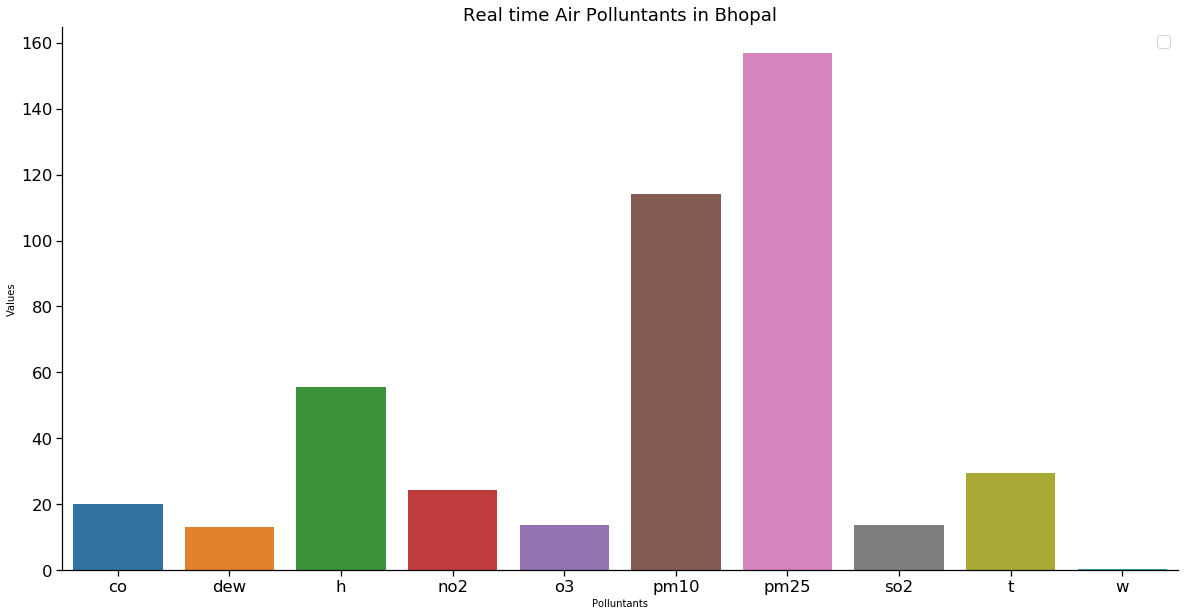

In [6]:
#Importing seaborn for plotting the polluntants
import seaborn as sb
import matplotlib.pyplot as plt
pollutants = [i for i in iaqi]
values = [i['v'] for i in iaqi.values()]

fig,ax = plt.subplots(figsize=(20, 10))
sb.despine()
sb.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2})

sb.barplot(x=pollutants, y=values)
ax.set_ylabel(ylabel = 'Values', fontsize = 10)
ax.set_xlabel(xlabel = 'Polluntants', fontsize = 10)
ax.set_title('Real time Air Polluntants in Bhopal')
ax.legend();

We can see that PM 2.5 and PM 10 and Ozone are the top pollutants in Air of Bhopal